## This workbook is an answer to Part B of the Final Assignment

### Key Steps and sections are listed below.  The initial cells are collapsed, pls refer to Part A for details.  If required, double click to see code
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3.5>

A.  <a>Import all libraries to be used for assignment</a></br>
B.  <a>Download and Clean Dataset</a></br>
C.  <a>Split data to Train and Test Data</a></br>
D.  <a>Build a Neural Network</a></br>
E.  <a>Compute metrics and analyse </a></br>
  
</font>
</div>


## QUESTIONS
<div class="alert alert-block alert-success" style="margin-top: 20px">
 <font size = 3.5>
     
1.  <a href="https://#item31"> Maintain same notebook as Part A</b> </a>  
2.  <a href="https://#item31"> Use scaled version of data <b>(X_train_scaled)</b> for training.</a>
3.  <a href="https://#item31"> Evaluate the  <b> mean and standard deviation of the mean squared errors </b> and compare with Part A results </a>  
  
</font>       
</div>

<a id="item31"></a>


## A. Import all libraries to be used for assignment


In [1]:
# Libraries for Data Wrangling and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Libraries for Modeling and Metrics
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
#This library is now imported for scores
from sklearn.model_selection import cross_val_score

## B. Download and inspect data to be used for modeling

In [2]:
concrete_data = pd.read_csv('concrete_data.csv')
#concrete_data.head()

#### Let's check how many data points we have.


In [3]:
#concrete_data.shape

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Check the dataset for any missing values.


In [4]:
#concrete_data.describe()

In [5]:
#concrete_data.isnull().sum()

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target using standard notation X for features and y for target


In [6]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

<a id="item2"></a>


In [7]:
#predictors.head()

In [8]:
#target.head()#

In [9]:
# For the preparation of baseline model, we revert to standard notation X and y
X = predictors
y = target

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Split data to Train and Test </b></center>
</div>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Scale data**

In [11]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance

#scaler=StandardScaler()
#scaler.fit(X_train)

#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled = (X_train - X_train.mean()) / X_train.std()
#X_train_scaled.head()

In [13]:
X_test_scaled = (X_test - X_test.mean()) / X_test.std()
#X_test_scaled.head()

In [14]:
#n_cols = predictors_norm.shape[1] # number of predictorsX_train_scaled
n_cols = X_train_scaled.shape[1]
#n_cols

<a id="item1"></a>


<a id='item32'></a>


<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Build Baseline Neural Network Model.</b></center>
</div>

**Assignment asks for Neural Network with the following parameters**

1.  <a>One hidden layer with 10 nodes</a></br>
2.  <a>adam optimizer and ReLu Activation</a></br>
3.  <a>mean squared error as loss function</a></br>

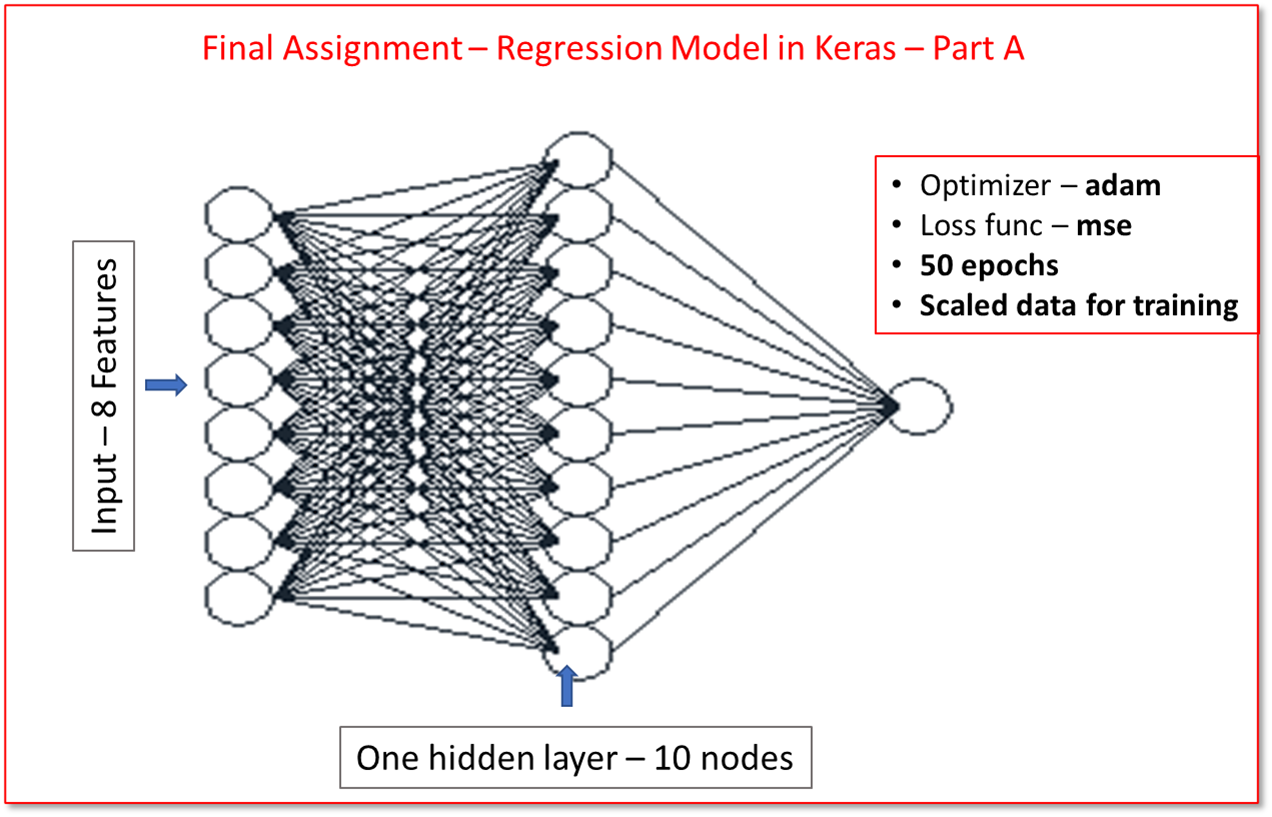

**Model function**

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Construct model using given parameters </b></center>
</div>

In [15]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.summary()
    return model

In [16]:
# build the model
model = regression_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Conducting 50 runs on the model now </b></center>
</div>

In [ ]:
mean_squared_error = []

for i in range(0, 50):
    #X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)
    history = model.fit(X_train_scaled, y_train, epochs =50)
    mse_neural = model.evaluate(X_test_scaled, y_test)
    #scores = model.evaluate(X_test, y_test)
    print("\nMean Squared Error " + str(i) + ": {}".format(mse_neural))
    mean_squared_error.append(mse_neural)

Epoch 1/50
23/23 [==============================] - 0s 640us/step - loss: 1495.9598
Epoch 2/50
23/23 [==============================] - 0s 635us/step - loss: 1482.2169
Epoch 3/50
23/23 [==============================] - 0s 544us/step - loss: 1467.3549
Epoch 4/50
23/23 [==============================] - 0s 544us/step - loss: 1450.9125
Epoch 5/50
23/23 [==============================] - 0s 544us/step - loss: 1432.7888
Epoch 6/50
23/23 [==============================] - 0s 499us/step - loss: 1412.9343
Epoch 7/50
23/23 [==============================] - 0s 544us/step - loss: 1391.3348
Epoch 8/50
23/23 [==============================] - 0s 499us/step - loss: 1367.9622
Epoch 9/50
23/23 [==============================] - 0s 589us/step - loss: 1342.7478
Epoch 10/50
23/23 [==============================] - 0s 589us/step - loss: 1315.4187
Epoch 11/50
23/23 [==============================] - 0s 544us/step - loss: 1287.2986
Epoch 12/50
23/23 [==============================] - 0s 544us/step - loss:

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> mean and standard deviation of computed mse</b></center>
</div>

**Mean of mse of 50 runs**

The output from runs above is a list, we convert it to DataFrame and use built in functions for mean and Standard Deviation

In [28]:
mse = pd.DataFrame(mean_squared_error, columns=["MSE"])

In [29]:
mse.mean()

MSE    69.69586
dtype: float64

In [30]:
mse.std()

MSE    40.658914
dtype: float64

### For this step we have mse of 69.7 and std of 40.7 which is an improvement from Part A with mse of 75.2 and std of 107.2.

<div class="alert alert-block alert-success">
    <font size = 4>
        <center><b> Further QC Steps conducted on generated data </b></center>
</div>

In [31]:
#Show the first 5 values of mse
mean_squared_error[0:5]

[295.0635070800781,
 160.43763732910156,
 131.11180114746094,
 111.3995590209961,
 98.98210906982422]

In [32]:
#Place mse list into Pandas dataframe
mse = pd.DataFrame(mean_squared_error, columns=["MSE"])
mse.head()

,MSE
0,295.063507
1,160.437637
2,131.111801
3,111.399559
4,98.982109


In [33]:
#Descriptive statistics for computed mse
mse.describe()

,MSE
count,50.000000
mean,69.695860
std,40.658914
min,47.435291
25%,48.060345
50%,49.658819
75%,83.311083
max,295.063507


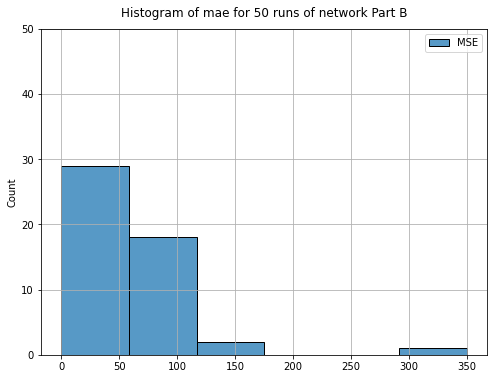

In [34]:
plt.figure(figsize=(8, 6))
#Visualization of mse
bins = np.linspace(0, 350, 7)
sns.histplot(mse, bins=bins)


plt.title("Histogram of mae for 50 runs of network Part B", loc='center', pad=12.0)

plt.ylim(0, 50)
#Visualization of mse
#sns.histplot(mse, bins=5)
plt.grid()
plt.show()



In [35]:
############################################
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

Predicted values are:  [[36.16319 ]
 [43.880424]
 [30.320091]
 [66.98572 ]
 [53.949707]]
Real values are:  252    38.33
4      44.30
601    32.04
171    59.20
387    51.02
Name: Strength, dtype: float64


In [36]:
#Sample of predicted data is taken for visualization
predictions = model.predict(X_test_scaled[:100])

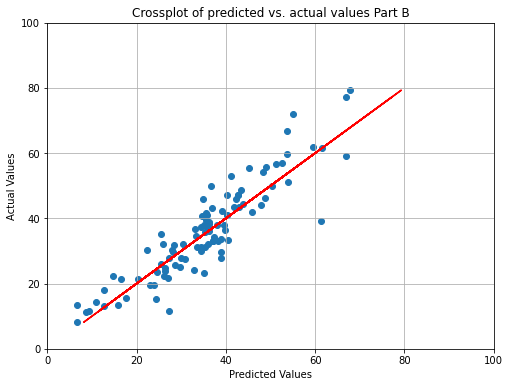

In [37]:
fig, ax = plt.subplots(figsize=(8,6))


#plot the training and validation accuracy and loss at each epoch

ax.set_title('Crossplot of predicted vs. actual values Part B')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.grid()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

ax.scatter(predictions, y_test[:100])

#Define line that shows perfect match
ax.plot(y_test[:100], y_test[:100], c='red')

plt.show()

**The above shows that we have a reasonable correlation between prediction and actual after 50 epochs**